<a href="https://colab.research.google.com/github/chin2yere/FDSfE_COffor/blob/main/class_work/classwork%2C_october_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd

In [30]:
bank = pd.read_csv("https://github.com/fedhere/FDSfE_FBianco/raw/main/data/bank_term_deposit.csv")


In [31]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        1042 non-null   int64 
 1   job        1042 non-null   object
 2   marital    1042 non-null   object
 3   education  1042 non-null   object
 4   default    1042 non-null   object
 5   balance    1042 non-null   int64 
 6   housing    1042 non-null   object
 7   loan       1042 non-null   object
 8   contact    1042 non-null   object
 9   day        1042 non-null   int64 
 10  month      1042 non-null   object
 11  duration   1042 non-null   int64 
 12  campaign   1042 non-null   int64 
 13  pdays      1042 non-null   int64 
 14  previous   1042 non-null   int64 
 15  poutcome   1042 non-null   object
 16  y          1042 non-null   object
dtypes: int64(7), object(10)
memory usage: 138.5+ KB


In [32]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,38,blue-collar,married,secondary,no,1663,yes,no,cellular,13,apr,217,3,327,1,failure,no
1,38,blue-collar,divorced,secondary,no,595,yes,no,cellular,7,may,245,3,-1,0,unknown,no
2,34,blue-collar,married,secondary,no,360,yes,no,telephone,19,nov,46,1,182,2,failure,no
3,60,admin.,married,secondary,no,1025,no,no,cellular,6,aug,388,8,-1,0,unknown,no
4,42,management,married,tertiary,no,520,no,no,cellular,4,nov,158,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,26,technician,single,secondary,no,668,yes,no,unknown,28,may,576,3,-1,0,unknown,yes
1038,60,self-employed,married,primary,no,362,no,yes,cellular,29,jul,816,6,-1,0,unknown,yes
1039,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,370,4,failure,yes
1040,32,admin.,single,secondary,no,620,yes,no,unknown,26,may,1234,3,-1,0,unknown,yes


In [33]:
#checks for unique elements
bank['y'].unique()

array(['no', 'yes'], dtype=object)

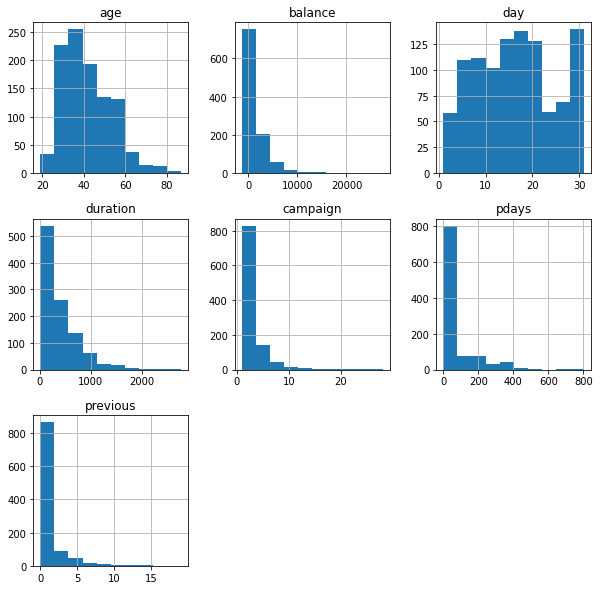

In [34]:
bank.hist(figsize=(10,10));

In [35]:
cols=["age", "balance", "duration", "marital"]
features=bank[cols]
target=bank["y"]

In [36]:
features

,age,balance,duration,marital
0,38,1663,217,married
1,38,595,245,divorced
2,34,360,46,married
3,60,1025,388,married
4,42,520,158,married
...,...,...,...,...
1037,26,668,576,single
1038,60,362,816,married
1039,42,1080,951,single
1040,32,620,1234,single


In [37]:
features["marital"].unique()

array(['married', 'divorced', 'single'], dtype=object)

In [38]:
#the technique that converts nominal data to integer is one hot encoding
pd.get_dummies(features["marital"])
#it takes every data and creates its own column for each unique element and gives 0 for no and 1 for yes

,divorced,married,single
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1037,0,0,1
1038,0,1,0
1039,0,0,1
1040,0,0,1


In [39]:
#just like saying print features+dummies
features.join(pd.get_dummies(features["marital"]))

,age,balance,duration,marital,divorced,married,single
0,38,1663,217,married,0,1,0
1,38,595,245,divorced,1,0,0
2,34,360,46,married,0,1,0
3,60,1025,388,married,0,1,0
4,42,520,158,married,0,1,0
...,...,...,...,...,...,...,...
1037,26,668,576,single,0,0,1
1038,60,362,816,married,0,1,0
1039,42,1080,951,single,0,0,1
1040,32,620,1234,single,0,0,1


In [40]:
features= features.join(pd.get_dummies(features["marital"])).drop(columns="marital")

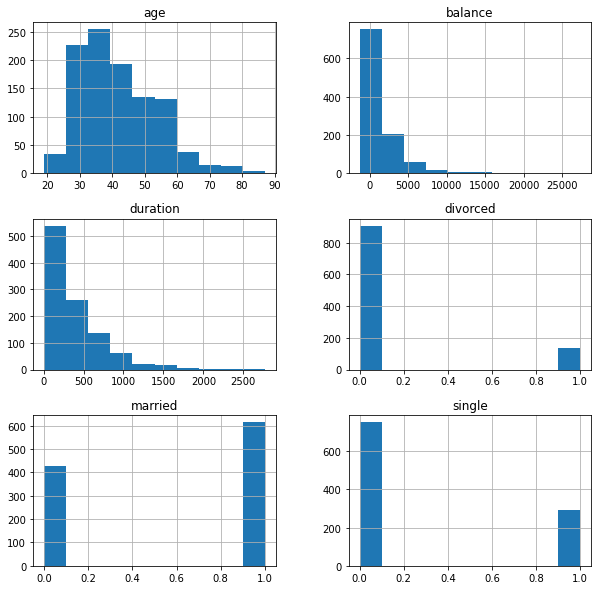

In [41]:
features.hist(figsize=(10,10));

In [42]:
#it is not recommended to standardize values that are zeros and ones
#we use min-max standardization
#(array-min(array))/max(array)-min(array)

In [43]:
features

,age,balance,duration,divorced,married,single
0,38,1663,217,0,1,0
1,38,595,245,1,0,0
2,34,360,46,0,1,0
3,60,1025,388,0,1,0
4,42,520,158,0,1,0
...,...,...,...,...,...,...
1037,26,668,576,0,0,1
1038,60,362,816,0,1,0
1039,42,1080,951,0,0,1
1040,32,620,1234,0,0,1


In [45]:
features= (features - features.min()) / (features.max() - features.min())

In [46]:
features

,age,balance,duration,divorced,married,single
0,0.279412,0.103701,0.075697,0.0,1.0,0.0
1,0.279412,0.066448,0.085838,1.0,0.0,0.0
2,0.220588,0.058251,0.013763,0.0,1.0,0.0
3,0.602941,0.081447,0.137631,0.0,1.0,0.0
4,0.338235,0.063832,0.054328,0.0,1.0,0.0
...,...,...,...,...,...,...
1037,0.102941,0.068994,0.205723,0.0,0.0,1.0
1038,0.602941,0.058321,0.292648,0.0,1.0,0.0
1039,0.338235,0.083365,0.341543,0.0,0.0,1.0
1040,0.191176,0.067320,0.444042,0.0,0.0,1.0


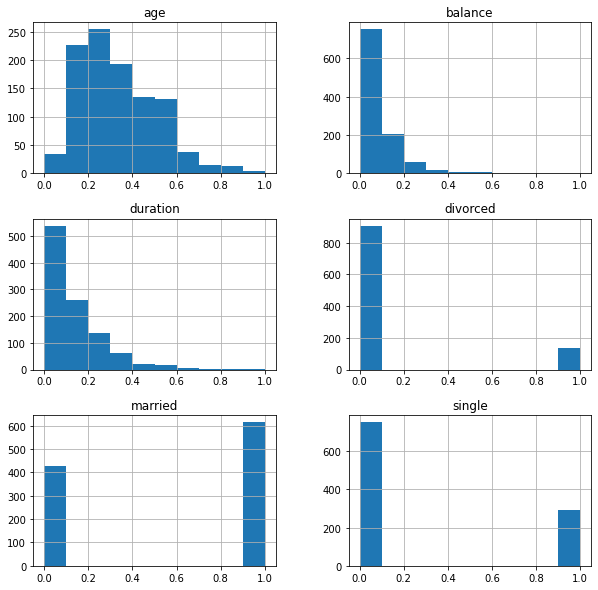

In [54]:
features.hist(figsize=(10,10));

In [47]:
#logistic regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logreg= LogisticRegression()

In [50]:
logreg.fit(features, target)

LogisticRegression()

In [51]:
logreg.coef_

array([[ 1.28185231,  0.87628753,  7.25857348,  0.03068071, -0.32548436,
         0.29485766]])

In [55]:
prediction=logreg.predict(features)

In [57]:
(prediction==target).sum() / len(target)

0.7236084452975048

In [58]:
#model evaluation

In [59]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(target, prediction))

              precision    recall  f1-score   support

          no       0.69      0.82      0.75       521
         yes       0.78      0.63      0.69       521

    accuracy                           0.72      1042
   macro avg       0.73      0.72      0.72      1042
weighted avg       0.73      0.72      0.72      1042



In [62]:
from sklearn.metrics import confusion_matrix

In [64]:
confusion_matrix(target, prediction)


array([[426,  95],
       [193, 328]])

In [65]:
confusion=confusion_matrix(target, prediction)

Text(33.0, 0.5, 'Actual')

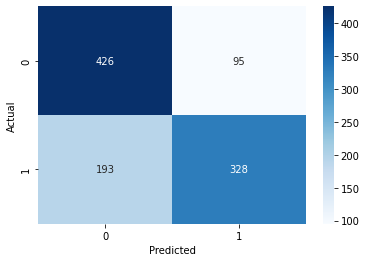

In [66]:
import seaborn as sns
import pylab as plt

sns.heatmap(confusion, cmap="Blues", annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")